# 2D AdaBoot Example
The Exampe is based on: https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-twoclass-py

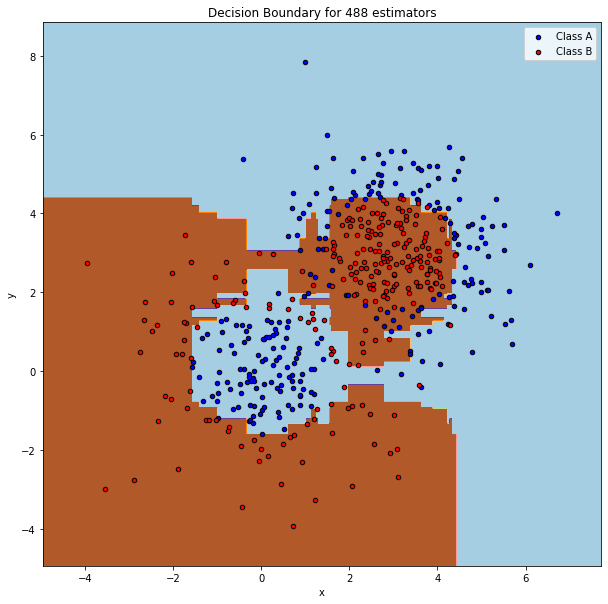

## Import needed packages

In [37]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Construct our toy dataset

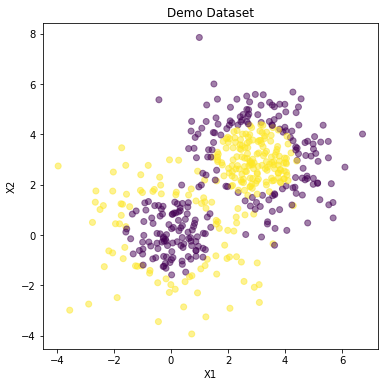

In [19]:
X1, y1 = make_gaussian_quantiles(
    cov=2.0, n_samples=200, n_features=2, n_classes=2, random_state=1
)
X2, y2 = make_gaussian_quantiles(
    mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=1
)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2 + 1))

## Visualize the dataset

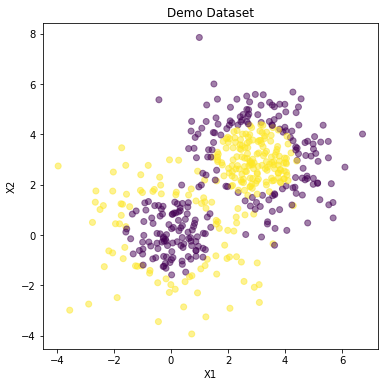

In [40]:
plt.figure(figsize=(6,6))
plt.title("Demo Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(X[:,0],X[:,1],c=y,alpha=0.5);

## Define a train and plot function
In order to change the number of estimators (`n_estimators`) interactively we wrap the whole training and visualization process into on function.

In [32]:
def trainAndPlot(n_estimators=100):

  # init our AdaBoost classifier
  bdt = AdaBoostClassifier(
      DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=n_estimators
  )

  # fit the classifier
  bdt.fit(X, y)

  # plot the results
  plot_colors = "br"
  plot_step = 0.02
  class_names = "AB"

  plt.figure(figsize=(10, 10))

  # Plot the decision boundaries
  #plt.subplot(121)
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(
      np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
  )

  Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
  plt.axis("tight")

  # Plot the training points
  for i, n, c in zip(range(2), class_names, plot_colors):
      idx = np.where(y == i)
      plt.scatter(
          X[idx, 0],
          X[idx, 1],
          c=c,
          cmap=plt.cm.Paired,
          s=20,
          edgecolor="k",
          label="Class %s" % n,
      )
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)
  plt.legend(loc="upper right")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title(f"Decision Boundary for {n_estimators} estimators")
  plt.show()

## Plot on example

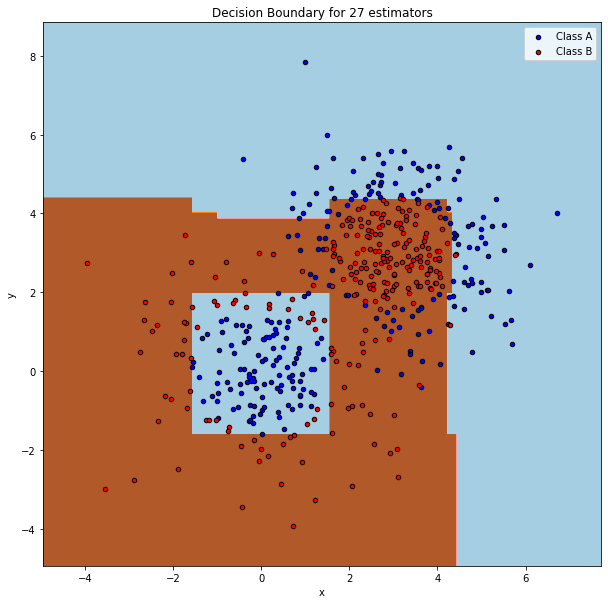

In [41]:
trainAndPlot(27)

## Change number of estimators ineractively

In [39]:
interact(trainAndPlot,n_estimators=(1,500));

interactive(children=(IntSlider(value=100, description='n_estimators', max=500, min=1), Output()), _dom_classe…